In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

In [2]:
import d2l

In [3]:
d2l.use_svg_display()

### 3.5.1 读取数据集

In [4]:
trans = transforms.ToTensor()

In [5]:
mnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True)

In [6]:
mnist_train[1][0]

In [7]:
mnist_train[1][1]

0

In [8]:
mnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True, transform=trans)

In [9]:
mnist_train[3][0].shape

torch.Size([1, 28, 28])

In [10]:
len(mnist_train)

60000

In [11]:
mnist_test = torchvision.datasets.FashionMNIST(root='../data', train=False, transform=trans)

In [12]:
mnist_test[0][0].shape

torch.Size([1, 28, 28])

In [13]:
len(mnist_test)

10000

In [14]:
data_iter = data.DataLoader(mnist_train, batch_size=20)

In [15]:
X, y = next(iter(data_iter))

In [16]:
X.shape

torch.Size([20, 1, 28, 28])

In [17]:
d2l.get_fashion_mnist_labels(y)

['短靴',
 'T恤',
 'T恤',
 '连衣裙',
 'T恤',
 '套衫',
 '运动鞋',
 '套衫',
 '凉鞋',
 '凉鞋',
 'T恤',
 '短靴',
 '凉鞋',
 '凉鞋',
 '运动鞋',
 '短靴',
 '裤子',
 'T恤',
 '衬衫',
 '外套']

In [18]:
X = X.reshape(20, 28, 28)

array([<Axes: title={'center': '短靴'}>, <Axes: title={'center': 'T恤'}>,
       <Axes: title={'center': 'T恤'}>, <Axes: title={'center': '连衣裙'}>,
       <Axes: title={'center': 'T恤'}>, <Axes: title={'center': '套衫'}>,
       <Axes: title={'center': '运动鞋'}>, <Axes: title={'center': '套衫'}>,
       <Axes: title={'center': '凉鞋'}>, <Axes: title={'center': '凉鞋'}>,
       <Axes: title={'center': 'T恤'}>, <Axes: title={'center': '短靴'}>,
       <Axes: title={'center': '凉鞋'}>, <Axes: title={'center': '凉鞋'}>,
       <Axes: title={'center': '运动鞋'}>, <Axes: title={'center': '短靴'}>,
       <Axes: title={'center': '裤子'}>, <Axes: title={'center': 'T恤'}>,
       <Axes: title={'center': '衬衫'}>, <Axes: title={'center': '外套'}>],
      dtype=object)

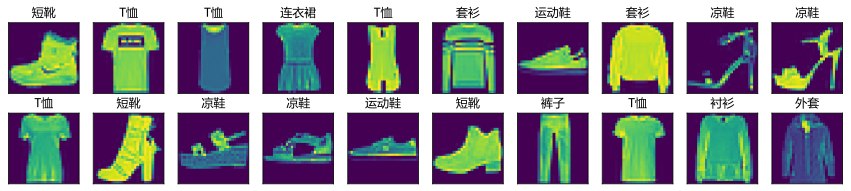

In [19]:
d2l.show_images(X, 2, 10, d2l.get_fashion_mnist_labels(y))

In [20]:
train_iter = data.DataLoader(mnist_train, batch_size=256, shuffle=True, num_workers=4)

In [21]:
timer = d2l.Timer()
for X, y in train_iter:
    pass
f'{timer.stop():.2f} sec'

'4.42 sec'

In [23]:
train_iter, test_iter = d2l.load_data_fashion_mnist(10)

torch.Size([10, 28, 28])


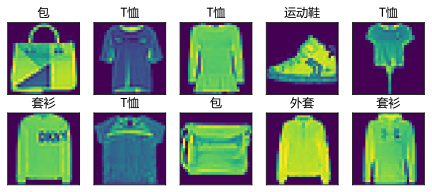

In [31]:
for X, y in train_iter:
    X = X.reshape(-1, 28, 28)
    print(X.shape)
    d2l.show_images(X, 2, 5, d2l.get_fashion_mnist_labels(y))
    break